In [2]:
install.packages('igraph')
#install.packages('rgdal') # already installed

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Warning message in install.packages("rgdal"):
“installation of package ‘rgdal’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [3]:
library(rgdal)
library(igraph)

Loading required package: sp
rgdal: version: 1.4-8, (SVN revision 845)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 3.0.4, released 2020/01/28
 Path to GDAL shared files: 
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 6.3.1, February 10th, 2020, [PJ_VERSION: 631]
 Path to PROJ.4 shared files: (autodetected)
 Linking to sp version: 1.4-1 

Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [ ]:
# roads <- readOGR('data','NY_RoadLink')
    #network <- xmlParse('data/NY_network.xml')
    # ! no xml package-> parse by hand?
    raw <- scan('Network_Exeter.xml',what='character',sep='\n')
        #head(raw)
    #tail(raw)

In [20]:

    # construct graph from xml
    splitted = sapply(raw[grep(pattern = '<node ',raw)],function(s){strsplit(s,' ')})
    ids = sapply(splitted,function(l){substring(l[2],5,nchar(l[2])-1)})
    x = sapply(splitted,function(l){as.numeric(substring(l[3],4,nchar(l[3])-1))})
    y = sapply(splitted,function(l){as.numeric(substring(l[4],4,nchar(l[4])-1))})
    #head(splitted);head(ids);head(x);head(y)
    vertices = data.frame(id=ids,x=x,y=y,type=rep('road',length(x)))
    splittedlinks = sapply(raw[grep(pattern = '<link ',raw)],function(s){strsplit(s,' ')})
    from = sapply(splittedlinks,function(l){substring(l[3],7,nchar(l[3])-1)})
    to = sapply(splittedlinks,function(l){substring(l[4],5,nchar(l[4])-1)})
    links = data.frame(from=from,to=to,type=rep('road',length(from)))
    #g = graph_from_data_frame(links,directed = T,vertices = vertices)
    #g
    # random shortest path for illustration
    #path = shortest_paths(g,from = sample(V(g),1),to=sample(V(g),1),output = 'both')
    #spedges = path$epath[[1]];ecolor = ifelse(E(g)%in%spedges,'red','black');esizes=ifelse(E(g)%in%spedges,0.5,0.01);spnodes=path$vpath[[1]];vcolor = ifelse(V(g)%in%spnodes,'red','black');vsizes=ifelse(V(g)%in%spnodes,2,0)
    # summary(E(g)%in%spedges)
    #options(repr.plot.width=10, repr.plot.height=5)
#par(mfrow=c(1,2),mar = c(0,0,0,0))
#plot(roads)
#plot.igraph(g,vertex.size=vsizes,vertex.color=vcolor,vertex.label=NA,vertex.frame.color=NA,
#            edge.label=NA,edge.arrow.size=0,edge.width=esizes,edge.color=ecolor)
    

In [14]:
 # add public transport nodes/edges
library(dplyr)

stops <- as.tbl(read.csv('gtfs/stops.txt'))
stoptimes <- as.tbl(read.csv('gtfs/stop_times.txt'))
stoptimes<- left_join(stoptimes,stops[,c('stop_id','stop_lon','stop_lat')])
peakhours = stoptimes[
c(grep(pattern='07:..:00',x=as.character(stoptimes$arrival_time)),
  grep(pattern='08:..:00',x=as.character(stoptimes$arrival_time)),
  grep(pattern='09:..:00',x=as.character(stoptimes$arrival_time))
),]

Joining, by = "stop_id"


In [21]:
alladdnodes=data.frame()
alladdedges=data.frame()
for(trip in unique(peakhours$trip_id)){
    currenttrip = peakhours[peakhours$trip_id==trip,]
    if(nrow(currenttrip)>1){
       maxid=max(as.numeric(as.character(vertices$id)))
       addnodes = data.frame(id= (1:nrow(currenttrip))+maxid,x=currenttrip$stop_lon,y=currenttrip$stop_lat,type=rep('pt',nrow(currenttrip)))
       addedges = data.frame(from = (1:(nrow(currenttrip)-1))+maxid,to=(2:(nrow(currenttrip)))+maxid,type=rep('pt',nrow(currenttrip)-1))
       alladdnodes = rbind(alladdnodes,addnodes)
       alladdedges=rbind(alladdedges,addedges)
        }
}

In [25]:
allvertices = data.frame(id=c(as.character(vertices$id),as.character(alladdnodes$id)),x=c(vertices$x,alladdnodes$x),y=c(vertices$y,alladdnodes$y),type=c(as.character(vertices$type),as.character(alladdnodes$type)))

In [26]:
alllinks = data.frame(from= c(as.character(links$from),as.character(alladdedges$from)),to=c(as.character(links$to),as.character(alladdedges$to)),type=c(as.character(links$type),as.character(alladdedges$type)))

In [29]:
g = graph_from_data_frame(alllinks,directed = T,vertices = allvertices[!duplicated(allvertices$id),])

In [31]:
ecolor = ifelse(E(g)$type=='pt','red','black')
vcolor = ifelse(V(g)$type=='pt','red','black')

ERROR: Error in plot.window(...): need finite 'xlim' values


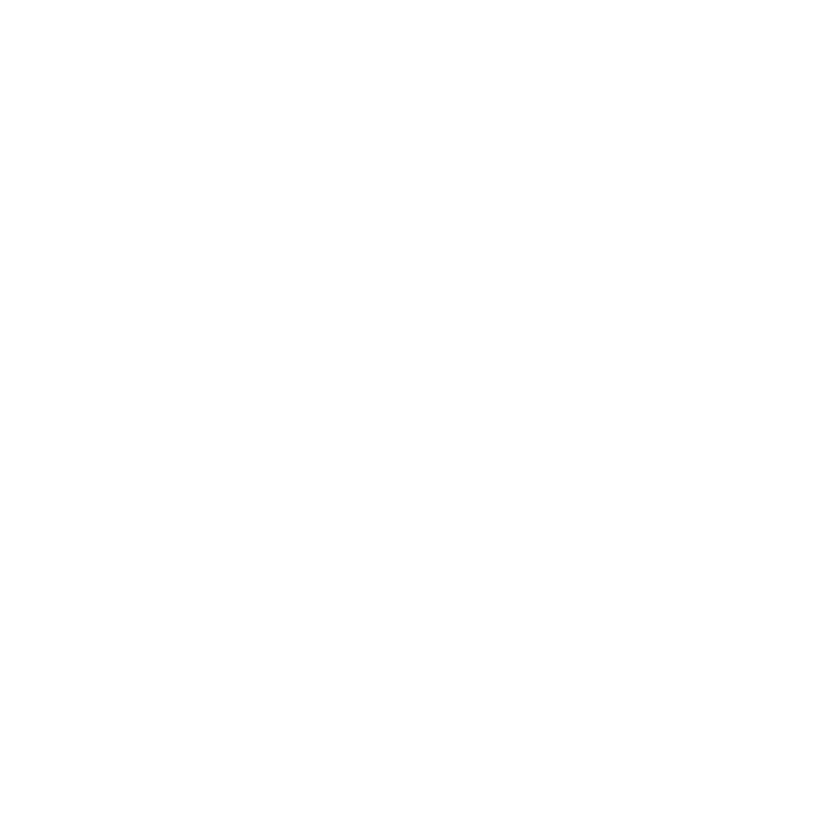

In [32]:
plot.igraph(g,vertex.size=NA,vertex.color=vcolor,vertex.label=NA,vertex.frame.color=NA,
            edge.label=NA,edge.arrow.size=0,edge.width=0.1,edge.color=ecolor)

In [ ]:
plot.igraph(g)

In [ ]:
summary(V(g)$x)
summary(V(g)$y)
vcolor
ecolor

In [34]:
help(igraph.plotting)

Drawing graphs {igraph},R Documentation
